# Dimensionality reduction plots


Dimensionality Reduction Plots

We'll perform a dimensionality reduction technique to plot the observations in 2 dimensions.

We'll use two techniques:

Principal Component Analysis: this technique relies on the obtention of the eigenvalues and eigenvectors of the 
data matrix and tries to provide a minimum number of variables that keep the maximum amount of variance.

t-SNE: the t-distributed Stochastic Neighbour Embedding is a probabilistic technique particularly well suited for the visualization of high-dimensional datasets. It minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding.



In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.manifold import TSNE

In [2]:
df_india = pd.read_csv('clean_reddit_india.csv')

with open('pickles/features_train.pkl', 'rb') as f:
    features_train = pickle.load(f)

with open('pickles/labels_train.pickle', 'rb') as f:
    labels_train = pickle.load(f)

with open('pickles/features_test.pkl', 'rb') as f:
    features_test = pickle.load(f)

with open('pickles/labels_test.pkl', 'rb') as f:
    labels_test = pickle.load(f)

In [3]:
features = np.concatenate((features_train,features_test), axis=0)
labels = np.concatenate((labels_train,labels_test), axis=0)


Create function for plots

In [8]:
def plot_dim_red(model, features, labels, n_components=2):
    
    if (model == 'PCA'):
        mod = PCA(n_components=n_components)
        title = "PCA decomposition"  # for the plot
        
    elif (model == 'TSNE'):
        mod = TSNE(n_components=2)
        title = "t-SNE decomposition" 

    else:
        return "Error"
    
    principal_components = mod.fit_transform(features)
    
    df_features = pd.DataFrame(data=principal_components,
                     columns=['PC1', 'PC2'])
    
    df_labels = pd.DataFrame(data=labels,
                             columns=['label'])
    
    df_full = pd.concat([df_features, df_labels], axis=1)
    df_full['label'] = df_full['label'].astype(str)

    with open('pickles/le_dict.pkl', 'rb') as f:
        le_dict = pickle.load(f)
    category_names = {v: k for k, v in le_dict.items()}
    print(category_names)

    df_full['label_name'] = df_full['label']
    df_full = df_full.replace({'label_name':category_names})

    plt.figure(figsize=(10,10))
    diverging_colors = sns.color_palette("Paired", 11)
    sns.scatterplot(x='PC1',
                    y='PC2',
                    hue="label_name", 
                    data=df_full,
                    palette=diverging_colors,
                    alpha=.7).set_title(title)

# PCA

{0: 'AskIndia', 1: 'Business/Finance', 2: 'CAA-NRC-NPR', 3: 'Coronavirus', 4: 'Food', 5: 'Non-Political', 6: 'Photography', 7: 'Politics', 8: 'Scheduled', 9: 'Science/Technology', 10: 'Sports'}


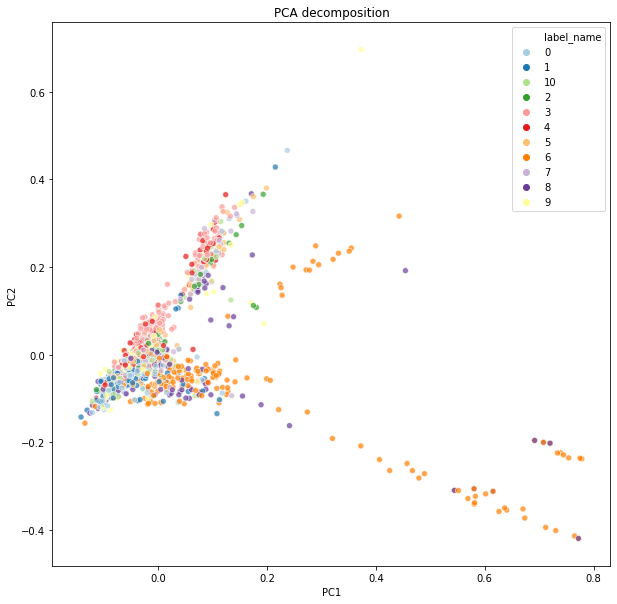

In [9]:
plot_dim_red("PCA", 
             features=features, 
             labels=labels,
             n_components=2)


# t-SNE

{0: 'AskIndia', 1: 'Business/Finance', 2: 'CAA-NRC-NPR', 3: 'Coronavirus', 4: 'Food', 5: 'Non-Political', 6: 'Photography', 7: 'Politics', 8: 'Scheduled', 9: 'Science/Technology', 10: 'Sports'}


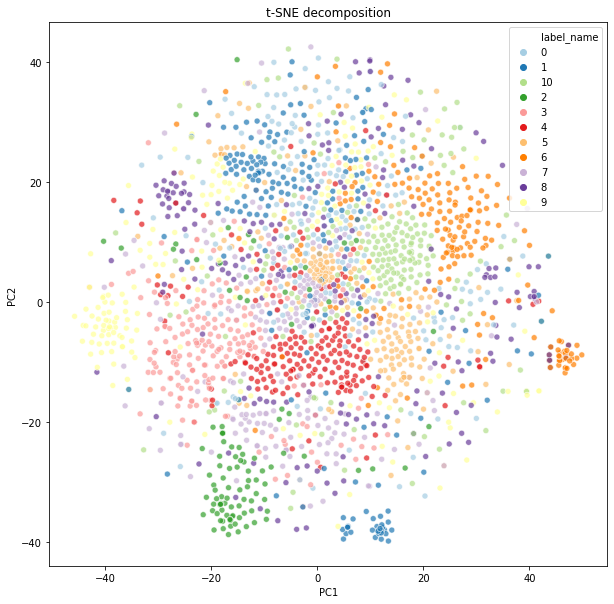

In [10]:
plot_dim_red("TSNE", 
             features=features, 
             labels=labels,
             n_components=2)

We can see that t-SNE works better on the dataset(due to the highly dimesnional dataset probabilistic techniques work better). 

We could also have explored using autoencoders for the same, but I consider it unnecessary due to the size of the dataset